# Traffic fines

https://www.gipuzkoairekia.eus/

In [39]:
# Import basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Read the data
usecols=[0, 4, 5, 6, 7, 8] # Useful columns
fines_2018 = pd.read_csv("data/multas/multas_2018.csv", sep=";", decimal=",", usecols=usecols)
fines_2019 = pd.read_csv("data/multas/multas_2019.csv", sep=";", decimal=",", usecols=usecols)
fines_2020 = pd.read_csv("data/multas/multas_2020.csv", sep=";", decimal=",", usecols=usecols)
fines_2021 = pd.read_csv("data/multas/multas_2021.csv", sep=";", decimal=",", usecols=usecols)
fines_2022 = pd.read_csv("data/multas/multas_2022.csv", sep=";", decimal=",", usecols=usecols)

In [41]:
# Concatenate the data into a unique dataset
fines = pd.concat([fines_2018, fines_2019, fines_2020, fines_2021, fines_2022])

# Rename columns
fines = fines.rename(columns={"AÑO": "year",
                              "NOMBRE CALLE": "street",
                              "CALIFICACION": "category",
                              "NRO MULTAS": "fines",
                              "IMPORTE PAGADO": "paid",
                              "IMPORTE PENDIENTE DE PAGO EN EJECUTIVA": "unpaid"})
fines

,year,street,category,fines,paid,unpaid
0,2018,NaN,LEVE,2,15.0,0.00
1,2018,GELTOKIEN ENPARANTZA,GRAVE,3,0.0,234.95
2,2018,GELTOKIEN ENPARANTZA,LEVE,52,640.8,279.15
3,2018,GELTOKIEN ENPARANTZA,MUY GRAVE,2,500.0,0.00
4,2018,EUSKADI ENPARANTZA,GRAVE,4,200.0,244.95
...,...,...,...,...,...,...
75,2022,IBAIONDO,GRAVE,2,200.0,0.00
76,2022,IBAIONDO,LEVE,45,385.0,259.65
77,2022,ESKUALDEKO OSPITALEA,GRAVE,34,2100.0,949.80
78,2022,ESKUALDEKO OSPITALEA,LEVE,62,675.0,533.55


In [42]:
# See how it looks like
fines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 0 to 79
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      340 non-null    int64  
 1   street    337 non-null    object 
 2   category  340 non-null    object 
 3   fines     340 non-null    int64  
 4   paid      340 non-null    float64
 5   unpaid    340 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 18.6+ KB


In [43]:
# Rows with NaN values
fines[fines["street"].isna()]

,year,street,category,fines,paid,unpaid
0,2018,NaN,LEVE,2,15.0,0.0
0,2020,NaN,MUY GRAVE,2,120.0,0.0
0,2021,NaN,MUY GRAVE,1,0.0,0.0


In [44]:
# Discard rows with NaN values
fines = fines[~fines["street"].isna()]

In [45]:
fines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337 entries, 1 to 79
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      337 non-null    int64  
 1   street    337 non-null    object 
 2   category  337 non-null    object 
 3   fines     337 non-null    int64  
 4   paid      337 non-null    float64
 5   unpaid    337 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 18.4+ KB


In [46]:
fines

,year,street,category,fines,paid,unpaid
1,2018,GELTOKIEN ENPARANTZA,GRAVE,3,0.0,234.95
2,2018,GELTOKIEN ENPARANTZA,LEVE,52,640.8,279.15
3,2018,GELTOKIEN ENPARANTZA,MUY GRAVE,2,500.0,0.00
4,2018,EUSKADI ENPARANTZA,GRAVE,4,200.0,244.95
5,2018,EUSKADI ENPARANTZA,LEVE,2,15.0,0.00
...,...,...,...,...,...,...
75,2022,IBAIONDO,GRAVE,2,200.0,0.00
76,2022,IBAIONDO,LEVE,45,385.0,259.65
77,2022,ESKUALDEKO OSPITALEA,GRAVE,34,2100.0,949.80
78,2022,ESKUALDEKO OSPITALEA,LEVE,62,675.0,533.55


## Years

In [47]:
# Group by years to analyse evolution
fines_years = fines.groupby(["year", "category"])["fines"].sum().unstack()

# Rearrange column order
fines_years = fines_years.iloc[:, [1, 0, 2]]

# Create new column with the total amount of fines
fines_years["total"] = fines_years.sum(axis=1)
fines_years

category,LEVE,GRAVE,MUY GRAVE,total
year,,,,
2018,1112,194,4,1310
2019,583,104,2,689
2020,1183,95,1,1279
2021,918,167,11,1096
2022,1604,158,11,1773


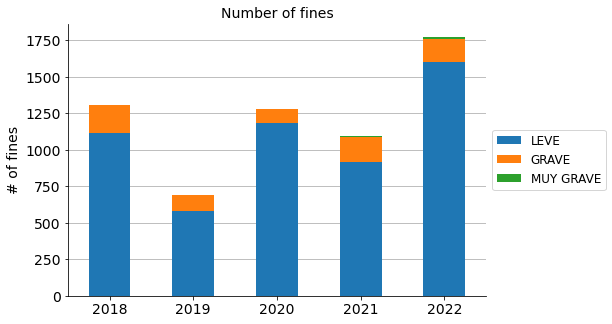

In [48]:
# Plot
fig, ax = plt.subplots(figsize=(7.5, 5))

fines_years.drop(["total"], axis=1).plot(ax=ax, kind="bar", stacked=True)

ax.grid(axis="y")
ax.set_axisbelow(True)
ax.tick_params(axis='x', labelsize=14, rotation=0)
ax.tick_params(axis='y', labelsize=14)
ax.set_title("Number of fines", fontsize=14)
ax.set_xlabel("", fontsize=13)
ax.set_ylabel("# of fines", fontsize=14)
ax.legend(bbox_to_anchor=(1.0, 0.5), loc='center left', fontsize=12)
sns.despine()

plt.show()

## Location

In [49]:
# Group by streets to analyse by place
fines_streets = fines.groupby(["street", "category"])["fines"].sum().unstack()

# Rearrange column order
fines_streets = fines_streets.iloc[:, [1, 0, 2]]

# Create new column with the total amount of fines
fines_streets["total"] = fines_streets.sum(axis=1)

# Sort values
fines_streets = fines_streets.sort_values("total", ascending=False)

# Create a list with the names of the top 10 fine streets
fines_streets_top10 = fines_streets.iloc[:10].index
fines_streets_top10

Index(['ZELAI-ARIZTI PARKEA', 'SEKUNDINO ESNAOLA KALEA',
       'ESKUALDEKO OSPITALEA', 'GELTOKIEN ENPARANTZA', 'PIEDAD KALEA',
       'BIDEZAR KALEA', 'KALEBARREN', 'ELIZKALE', 'SAN GREGORIO KALEA',
       'LEGAZPI KALEA'],
      dtype='object', name='street')

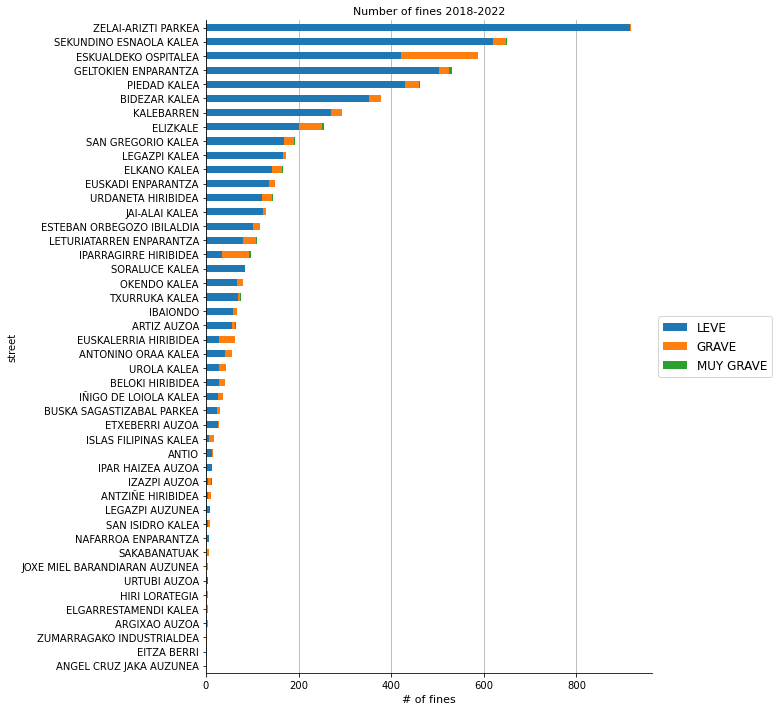

In [50]:
# Plot
fig, ax = plt.subplots(figsize=(8, 12))

# fines_streets["total"].sort_values().plot(ax=ax, kind="barh")
fines_streets.sort_values("total").drop("total", axis=1).plot(ax=ax, kind="barh", stacked=True)

ax.grid(axis="x")
ax.set_axisbelow(True)
ax.set_title("Number of fines 2018-2022", size=11)
ax.set_xlabel("# of fines", fontsize=11)
ax.legend(bbox_to_anchor=(1.0, 0.5), loc='center left', fontsize=12)
sns.despine()

plt.show()

## Year - Location

In [51]:
# Group by year and streets
fines_years_streets = fines.groupby(["year", "street", "category"])["fines"].sum().unstack()

# Rearrange column order
fines_years_streets = fines_years_streets.iloc[:, [1, 0, 2]]

# Create new column with the total amount of fines
fines_years_streets["total"] = fines_years_streets.sum(axis=1)

fines_years_streets

category                   LEVE  GRAVE  MUY GRAVE  total
year street                                             
2018 ANTIO                  9.0    3.0        NaN   12.0
     ANTONINO ORAA KALEA    1.0    1.0        NaN    2.0
     ARGIXAO AUZOA          1.0    NaN        NaN    1.0
     ARTIZ AUZOA           24.0    1.0        NaN   25.0
     BELOKI HIRIBIDEA      12.0    3.0        NaN   15.0
...                         ...    ...        ...    ...
2022 SORALUCE KALEA         6.0    NaN        NaN    6.0
     TXURRUKA KALEA        43.0    1.0        1.0   45.0
     URDANETA HIRIBIDEA    62.0    5.0        NaN   67.0
     UROLA KALEA            9.0    1.0        NaN   10.0
     ZELAI-ARIZTI PARKEA  209.0    1.0        NaN  210.0

[189 rows x 4 columns]

In [52]:
fines_years_streets = fines_years_streets.reset_index()
fines_years_streets_top10 = fines_years_streets[fines_years_streets["street"]\
                                                .isin(fines_streets_top10)]
fines_years_streets_top10

category,year,street,LEVE,GRAVE,MUY GRAVE,total
5,2018,BIDEZAR KALEA,27.0,7.0,NaN,34.0
7,2018,ELIZKALE,34.0,9.0,NaN,43.0
9,2018,ESKUALDEKO OSPITALEA,149.0,48.0,NaN,197.0
14,2018,GELTOKIEN ENPARANTZA,52.0,3.0,2.0,57.0
23,2018,KALEBARREN,32.0,1.0,NaN,33.0
25,2018,LEGAZPI KALEA,10.0,2.0,NaN,12.0
29,2018,PIEDAD KALEA,37.0,8.0,NaN,45.0
31,2018,SAN GREGORIO KALEA,51.0,6.0,NaN,57.0
32,2018,SEKUNDINO ESNAOLA KALEA,202.0,8.0,NaN,210.0
38,2018,ZELAI-ARIZTI PARKEA,263.0,NaN,NaN,263.0


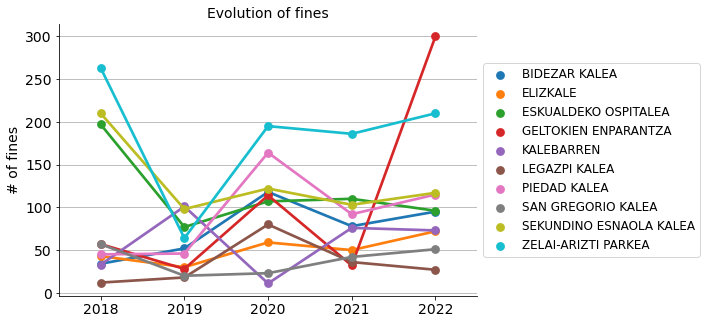

In [56]:
# Plot
fig, ax = plt.subplots(figsize=(7.5, 5))

sns.pointplot(ax=ax, x="year", y="total", data=fines_years_streets_top10,
              hue="street")

ax.grid(axis="y")
ax.set_axisbelow(True)
ax.tick_params(axis='x', labelsize=14, rotation=0)
ax.tick_params(axis='y', labelsize=14)
ax.set_title("Evolution of fines", fontsize=14)
ax.set_xlabel("", fontsize=13)
ax.set_ylabel("# of fines", fontsize=14)
ax.legend(bbox_to_anchor=(1.0, 0.5), loc='center left', fontsize=12)
sns.despine()

plt.show()